In [2]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C60_cherry_and_middle_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [3]:
data

['t_n55          9.4052 ( 8.9297,  9.9420) ( 8.8931,  9.9016)  1.0085 (Jnode 106)\n',
 't_n56          9.2556 ( 8.8357,  9.7068) ( 8.8249,  9.6928)  0.8679 (Jnode 105)\n',
 't_n57          8.7212 ( 8.3466,  9.1169) ( 8.3364,  9.1051)  0.7688 (Jnode 104)\n',
 't_n58          7.6350 ( 7.4169,  7.8634) ( 7.4178,  7.8641)  0.4463 (Jnode 103)\n',
 't_n59          7.1835 ( 6.9788,  7.3846) ( 6.9870,  7.3891)  0.4022 (Jnode 102)\n',
 't_n60          6.8632 ( 6.6523,  7.0726) ( 6.6473,  7.0661)  0.4188 (Jnode 101)\n',
 't_n61          6.4274 ( 6.2043,  6.6502) ( 6.2129,  6.6548)  0.4419 (Jnode 100)\n',
 't_n62          3.4296 ( 2.9996,  3.9033) ( 2.9859,  3.8858)  0.8999 (Jnode 99)\n',
 't_n63          4.6317 ( 4.5750,  4.7603) ( 4.5715,  4.7347)  0.1632 (Jnode 98)\n',
 't_n64          3.0170 ( 2.7991,  3.2462) ( 2.7963,  3.2425)  0.4463 (Jnode 97)\n',
 't_n65          2.7540 ( 2.5644,  2.9585) ( 2.5589,  2.9523)  0.3934 (Jnode 96)\n',
 't_n66          2.3585 ( 2.2160,  2.5216) ( 2.2114,  2.51

In [4]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [5]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    if line[3].startswith('('):
        lower_ci_iqtree.append(float(line[3][1:-1]))
    else:
        lower_ci_iqtree.append(float(line[3][1:-1]))
    if line[4].startswith('('):
        upper_ci_iqtree.append(float(line[4][1:-1]))
    else:
        upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))
#
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [6]:
node_name

['t_n55',
 't_n56',
 't_n57',
 't_n58',
 't_n59',
 't_n60',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107']

In [7]:
posterior_mean_iqtree

[9.4052,
 9.2556,
 8.7212,
 7.635,
 7.1835,
 6.8632,
 6.4274,
 3.4296,
 4.6317,
 3.017,
 2.754,
 2.3585,
 1.9421,
 1.6601,
 0.6279,
 3.684,
 6.8894,
 6.6383,
 6.3081,
 4.5819,
 4.1123,
 5.0736,
 7.1906,
 6.9031,
 6.6564,
 6.2902,
 5.8582,
 5.7025,
 5.1184,
 4.6981,
 4.3243,
 3.3847,
 3.1354,
 5.131,
 4.2631,
 7.0309,
 1.8818,
 6.8549,
 6.4045,
 5.7791,
 5.4182,
 3.8551,
 4.7572,
 5.3501,
 5.1237,
 4.758,
 3.4979,
 5.1096,
 7.6271,
 4.5194,
 2.5179,
 2.9561,
 5.7894]

In [8]:
lower_ci_iqtree

[0.9297,
 0.8357,
 0.3466,
 0.4169,
 0.9788,
 0.6523,
 0.2043,
 0.9996,
 0.575,
 0.7991,
 0.5644,
 0.216,
 0.865,
 0.6489,
 0.6146,
 0.5858,
 0.6929,
 0.3707,
 0.1483,
 0.0756,
 0.5798,
 0.0441,
 0.9936,
 0.7002,
 0.4494,
 0.0847,
 0.6799,
 0.5236,
 0.9557,
 0.5296,
 0.1418,
 0.2558,
 0.0562,
 0.9879,
 0.1631,
 0.831,
 0.6453,
 0.6631,
 0.2272,
 0.6325,
 0.3148,
 0.3773,
 0.703,
 0.046,
 0.7991,
 0.4175,
 0.0763,
 0.6707,
 0.0123,
 0.7601,
 0.9937,
 0.3795,
 0.8088]

In [9]:
upper_ci_iqtree

[9.942,
 9.7068,
 9.1169,
 7.8634,
 7.3846,
 7.0726,
 6.6502,
 3.9033,
 4.7603,
 3.2462,
 2.9585,
 2.5216,
 2.0352,
 1.6909,
 0.6637,
 3.8802,
 7.0836,
 6.8829,
 6.4275,
 5.0522,
 4.5983,
 5.149,
 7.3991,
 7.1103,
 6.8647,
 6.4924,
 6.0506,
 5.9007,
 5.3232,
 4.9033,
 4.5298,
 3.566,
 3.3138,
 5.297,
 4.4605,
 7.2351,
 2.2517,
 7.0548,
 6.5881,
 5.9318,
 5.4918,
 4.3195,
 4.8762,
 5.6821,
 5.4658,
 5.128,
 3.9652,
 5.5001,
 8.1552,
 5.2001,
 3.2016,
 3.5368,
 6.8424]

In [10]:
file_LG = open("LG_cherry_and_middle_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    if line[3].startswith('('):
        lower_ci_baseml.append(float(line[3][1:-1]))
    else:
         lower_ci_baseml.append(float(line[3][:-1]))
    if line[4].startswith('('):
        upper_ci_baseml.append(float(line[4][1:-1]))
    else:
         upper_ci_baseml.append(float(line[4][:-1]))
        
    
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

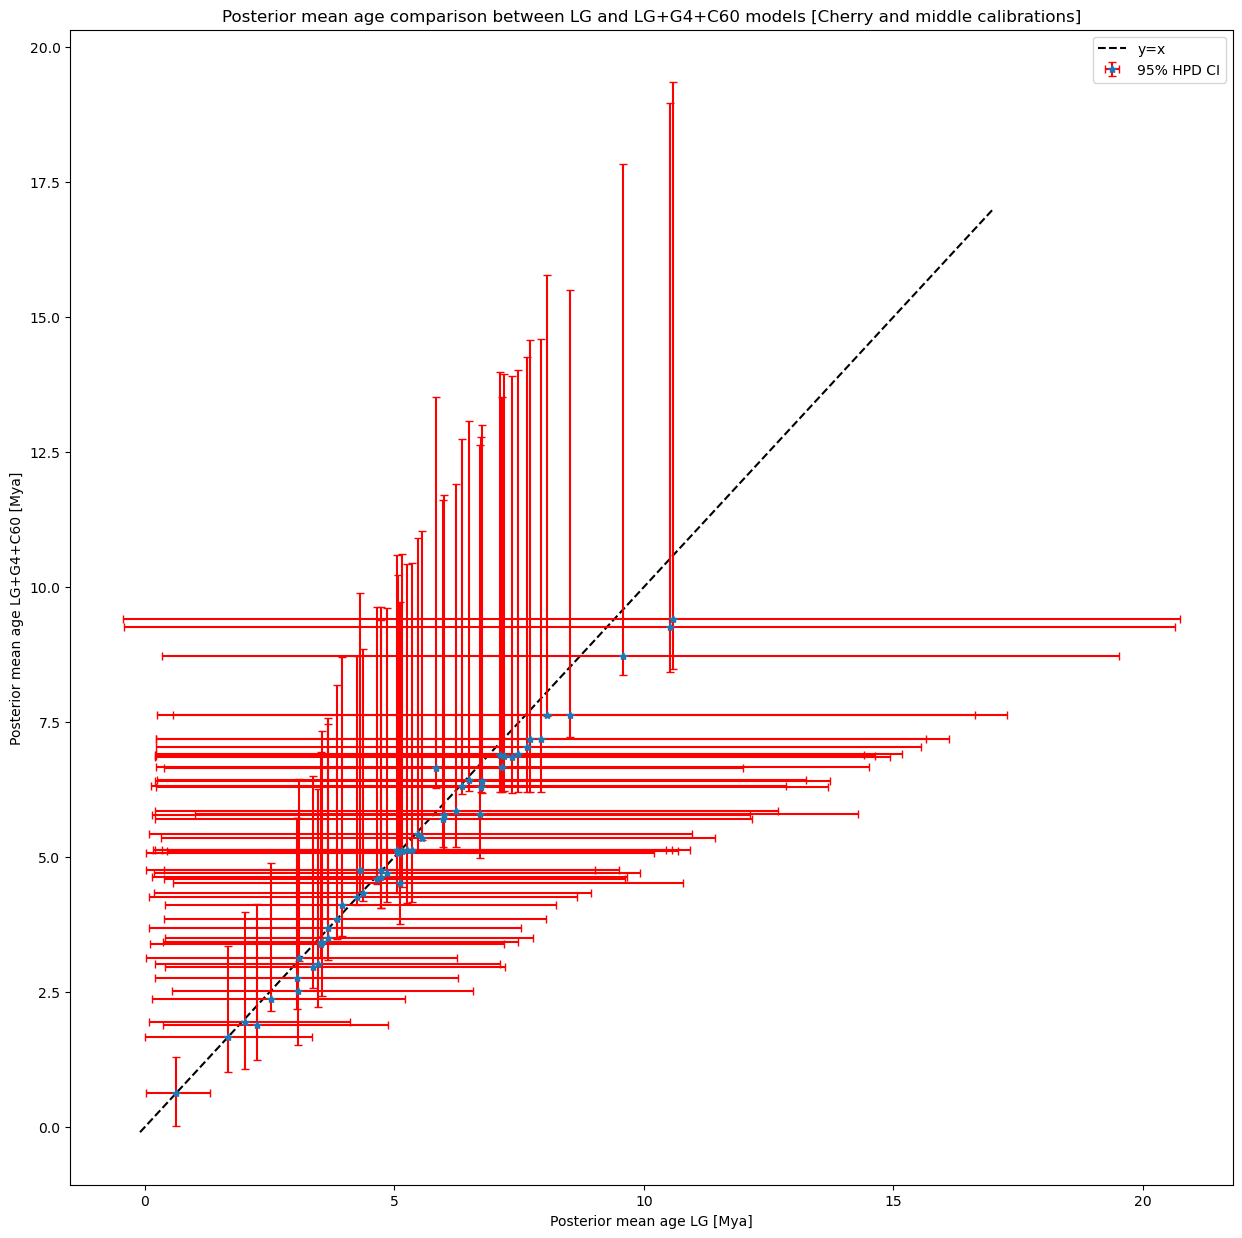

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot([-0.1,17], 
        [-0.1, 17], 
        'k--', label='y=x')
ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
            xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')

# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4+C60 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4+C60 models [Cherry and middle calibrations]')
ax.legend()

# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_C60_cm.png')

In [12]:
posterior_mean_baseml

[10.5774,
 10.5301,
 9.5848,
 8.5096,
 7.7099,
 7.1927,
 6.4945,
 3.5416,
 4.7258,
 3.466,
 3.0527,
 2.5322,
 2.0105,
 1.6581,
 0.6283,
 3.6744,
 7.1109,
 5.8342,
 6.3611,
 4.6503,
 3.9424,
 5.0663,
 7.9416,
 7.473,
 7.1477,
 6.7333,
 6.2416,
 5.9752,
 5.351,
 4.8498,
 4.3666,
 3.5331,
 3.0841,
 5.2408,
 4.2472,
 7.6651,
 2.2352,
 7.3548,
 6.7609,
 5.9873,
 5.4616,
 3.8391,
 4.7235,
 5.5596,
 5.0545,
 4.3036,
 3.6767,
 5.145,
 8.0557,
 5.1137,
 3.0684,
 3.3677,
 6.721]

In [13]:
posterior_mean_iqtree

[9.4052,
 9.2556,
 8.7212,
 7.635,
 7.1835,
 6.8632,
 6.4274,
 3.4296,
 4.6317,
 3.017,
 2.754,
 2.3585,
 1.9421,
 1.6601,
 0.6279,
 3.684,
 6.8894,
 6.6383,
 6.3081,
 4.5819,
 4.1123,
 5.0736,
 7.1906,
 6.9031,
 6.6564,
 6.2902,
 5.8582,
 5.7025,
 5.1184,
 4.6981,
 4.3243,
 3.3847,
 3.1354,
 5.131,
 4.2631,
 7.0309,
 1.8818,
 6.8549,
 6.4045,
 5.7791,
 5.4182,
 3.8551,
 4.7572,
 5.3501,
 5.1237,
 4.758,
 3.4979,
 5.1096,
 7.6271,
 4.5194,
 2.5179,
 2.9561,
 5.7894]

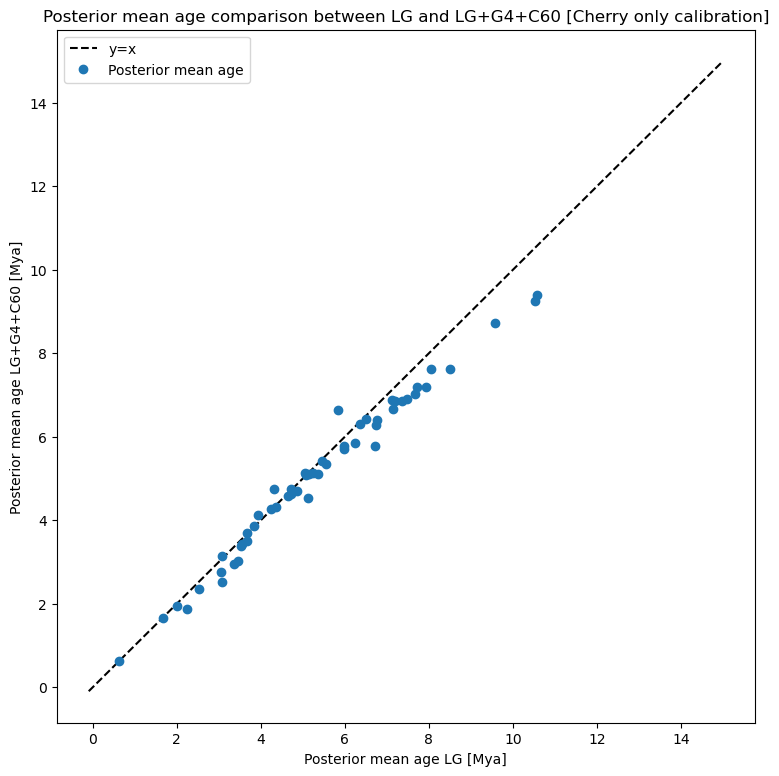

In [14]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,15], 
        [-0.1, 15], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4+C60 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4+C60 [Cherry and middle calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_C60_cm_scatter.png')